Like most approximation techniques, SciNet works best with smooth, continuous functions on a bounded domain and range.

A great example of the ease with which both SciNet and polynomial approximations learn to approximate these functions is $arcsin$. This function is necessary in order to compute the heliocentric angles from the earth-centered ones for the Solar System application of SciNet, discussed in [ITEN 2020]. However, it is also easily approximated by high-degree polynomials, as we can see here:

In [3]:
# Imports and fitting.

import numpy as np
import sklearn as skl 
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import lstsq

xs = np.arange(-0.999, 0.999, 0.001)
ys = np.arcsin(xs)

o3 = PolynomialFeatures(3)
o5 = PolynomialFeatures(5)
o7 = PolynomialFeatures(7)
o13 = PolynomialFeatures(13)

x3 = o3.fit_transform(xs.reshape(-1, 1))
x5 = o5.fit_transform(xs.reshape(-1, 1))
x7 = o7.fit_transform(xs.reshape(-1, 1))
x13 = o13.fit_transform(xs.reshape(-1, 1))

params3, _, _, _ = lstsq(x3, ys)
params5, _, _, _ = lstsq(x5, ys)
params7, _, _, _ = lstsq(x7, ys)
params13, _, _, _ = lstsq(x13, ys)

y3 = np.matmul(x3, params3)
y5 = np.matmul(x5, params5)
y7 = np.matmul(x7, params7)
y13 = np.matmul(x13, params13)

/nfs01/shared_software/anaconda3/envs/artem/lib/python3.5/site-packages/ipykernel_launcher.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/nfs01/shared_software/anaconda3/envs/artem/lib/python3.5/site-packages/ipykernel_launcher.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/nfs01/shared_software/anaconda3/envs/artem/lib/python3.5/site-packages/ipykernel_launcher.py:23: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimens

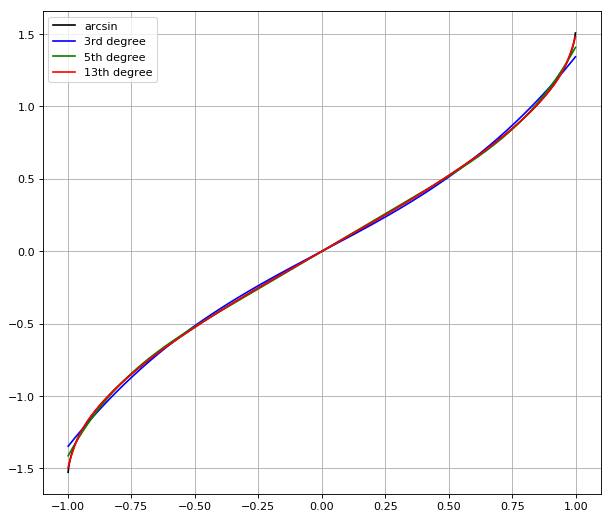

In [9]:
# Plotting

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')

plt.grid(True)

plt.plot(xs, ys, 'k-', label='arcsin')

plt.plot(xs, y3, 'b-', label='3rd degree')
plt.plot(xs, y5, 'g-', label='5th degree')
#plt.plot(xs, y7, 'p-')
plt.plot(xs, y13, 'r-', label='13th degree')

plt.legend()

plt.show()

There is no reason for SciNet, with many more free parameters, to be any less expressive than a 13th degree polynomial.